<h1 align="center">WORKOUT ACTIVITY PREDICTIVE MODELS</h1>
<h3 align="center">Regression, Classification and Clustering</h3>
<br>
<br>
<center>Practical Assignment</center>
<center>A240A0050 Big Data in Business and Industry</center>
<center>Autumn 2022</center>
<center>Authors: Thanh Tran (000285359), Nghia Nguyen (000275466)</center>

A dataset containing tracking **workout details** belonging to one person for the period from 2017 to 2020 with **3456 events** recorded with a sport tracking software named Endomondo has been offered for this project.

The modelling goal is to construct a **predictive model** which is capable to suggest the exercise type, time and duration of the next workout event.

In order to accomplish the modelling goal, **three alternatives** have been implemented and compared in terms of  performance, optimization, computation efficiency, degree of complexity, time efficiency... One alternative will be concluded as our **final model**.

## Modelling Plan

This project aims at generating **ONE FINAL PREDICTIVE MODEL** to predict the **exercise type, time** and **duration** of the person's **next workout event**.

- Alternative 1: Using all variables without NaN with **No movement patterns** considered => KNN classifier, Linear Regressor
- Alternative 2: Using all variables with filled values and **2D (latitude, longtitude) movement patterns** => KNN classifier, Linear Regressor
- Alternative 3: Using all variables with filled values and **3D (latitude, longtitude, altitude) movement patterns** => KNN classifier, Linear Regressor
- Decision on the most optimal model => **FINAL MODEL**

## Source code

* The repository to the project is made public and can be accessed from [HERE](https://github.com/Thanhtrannd/WorkoutBigDataPredictiveModel.git)  


## Procedure

* Data Exploration (JSON Data Loading, Plotting)
* Data Pretreatment (Checking & Filling NaN values, One-hot encoding, Data Normalization)
* Feature Engineering (Data Mining, timeseries shifting, Data Transformation)
* Model Construction (KNN Classifier, Linear Regressor)
* Final Model Selection

##  Introduction

Clustering methods partition a dataset consisting of $m$ data points $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$, into a small number of groups or "clusters" $\mathcal{C}_{1},\ldots,\mathcal{C}_{k}$. Each cluster $\mathcal{C}_{l}$ represents a subset of data points which are more similar to each other than to data points in another cluster. The precise meaning of two data points being "similar" depends on the application at hand. 

Clustering methods do not require labeled data and can be applied to data points characterized solely by its features $\mathbf{x}^{(i)}$. Therefore, clustering methods are an example of **unsupervised machine learning methods**. However, clustering methods are also used in combination (e.g., as a preprocessing step) with supervised learning methods such as regression or classification. 

Clustering methods are roughly divided into two groups:

* Hard clustering methods that assign each data point to exactly one cluster and 
* Soft clustering methods that assign each data point to several different clusters with varying degrees of belonging.

Hard clustering can be interpreted as a special case of soft-clustering where the degrees of belonging are enforced to be either 0 (not belonging) or 1 (belongs). 

This notebook will consider one popular method for hard clustering, the k-means algorithm, and one popular method for soft clustering based on a probabilistic Gaussian mixture model (GMM). These two methods use a notion of similarity that is tied to the Euclidean geometry of $\mathbb{R}^{n}$. 

The notebook also presents the DBSCAN algorithm, which is a hard clustering method that uses a non-Euclidean notion of similarity to cluster the data points. 

## The Data

Our data has been offered in form of a separate JSON file for each workout event. The tracking data comes from 2 sources which are auto-tracking and manual input. That causes inconsistency in the raw data with a plethora of NaN values for several features.

Therefore, the data after loading has yet been ready for model construction, so several steps of exploration and pretreatment need to be carried out.

## Data Exploration

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Loading the Data with movement details. 
 
The following code loads and transforms the dataset into a neat pandas dataframe which is saved into a csv file named `"df_res.csv"`, in which each row represents a data point and each column a feature.
The loading step can be commented out to save computational power and time consumption for reloading 3456 JSON files.
</div>

In [507]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import string
import re
#import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, Math
import joblib

# # Define helper function for data loading and locating to one data frame
# def read_file_to_df(filename):
#     """ Created by h17163,
#         start and end latitude and longitude loading modified by Thanh Tran
#     """
#     data = pd.read_json(filename, typ='series')
#     value = []
#     key = []
#     for j in list(range(0, data.size)):
#         if list(data[j].keys())[0] != 'points':
#             key.append(list(data[j].keys())[0])
#             value.append(list(data[j].items())[0][1])
#             dictionary = dict(zip(key, value))
       

#     if list(data[j].keys())[0] == 'points':
#         try:
#             # start = list(list(list(data[data.size-1].items()))[0][1][0][0].items())[0][1][0]
#             # dictionary['start_lat'] = list(start[0].items())[0][1]
#             # dictionary['start_long'] = list(start[1].items())[0][1]
#             # dictionary['end_lat'] = list(start[0].items())[0][1]
#             # dictionary['end_long'] = list(start[1].items())[0][1]
#             points = list(data[j].items())[0][1]
#             start = points[0]
#             end = points[-1]
#             start_loc = start[0]['location']
#             end_loc = end[0]['location']
#             dictionary['start_lat'] = start_loc[0][0]['latitude']
#             dictionary['start_long'] = start_loc[0][1]['longitude']
#             dictionary['end_lat'] = end_loc[0][0]['latitude']
#             dictionary['end_long'] = end_loc[0][1]['longitude']
            
#         except:
#             print('No detailed data recorded')
            
        
#     df = pd.DataFrame(dictionary, index = [0])

#     return df

# # Load JSON data files from data folder @author: h17163
# folder = 'WorkoutData_2017to2020'
# file_list = os.listdir(folder)

# # Create Empty DataFrame @author: h17163
# df_res = pd.DataFrame()

# # Read files to a common dataframe @author: h17163
# for filename in file_list:
#     print('\n'+ filename)
#     df_process = read_file_to_df(folder + '/' + filename)
#     df_res = pd.concat([df_res, df_process], 0)

# df_res.reset_index(drop=True, inplace = True)

# # Save loaded data frame into "./data/df_res.csv"
# df_res.to_csv('data/df_res.csv', index = False)

# Read in data from the csv file and store it in the data matrix df_rex.
df_res = pd.read_csv("./data/df_res.csv")

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))

# Acknowledge the number of variables (columns) and observations (rows)
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape  # number of columns
print(f"The dataframe \"df_res\" has {df_res_nCol} variables (columns) and {df_res_nObs} observations (rows).")


First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23.0,2017-01-01 08:53:04.0,2017-01-01 09:27:49.0,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231976,27.729551,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04.0,2017-01-01 14:01:00.0,2017-01-01 14:41:00.0,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03.0,2017-01-01 17:46:00.0,2017-01-01 18:12:07.0,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231758,27.729491,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23.0,2017-01-02 08:55:52.0,2017-01-02 09:26:06.0,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231829,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51.0,2017-01-02 16:13:34.0,2017-01-02 16:54:52.0,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.232033,27.729567,NaN


The dataframe "df_res" has 19 variables (columns) and 3456 observations (rows).


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2:</b> Plotting the Data (Duration against Time of each exercise type)

The data is plotted in a scatter plot using the custom helper function `plotting` for plotting a scatter plot of a dataset with or without clusters.
</div>

In [508]:
def plotting(data, centroids=None, clusters=None, title='Data', show=True):
    # This function will later on be used for plotting the clusters and centroids. But now we use it to just make a scatter plot of the data
    # Input: the data as an array, cluster means (centroids), cluster assignemnts in {0,1,...,k-1}   
    # Output: a scatter plot of the data in the clusters with cluster means
    plt.figure(figsize=(8,6))
    data_colors = ['orangered', 'dodgerblue', 'springgreen']
    centroid_colors = ['red', 'darkblue', 'limegreen'] # Colors for the centroids
    plt.style.use('ggplot')
    plt.title(title)
    plt.xlabel("feature $x_1$: customers' age")
    plt.ylabel("feature $x_2$: money spent during visit")

    alp = 0.5             # data points alpha
    dt_sz = 20            # marker size for data points 
    cent_sz = 130         # centroid sz 
    
    if centroids is None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
    if centroids is not None and clusters is None:
        plt.scatter(data[:,0], data[:,1], s=dt_sz, alpha=alp, c=data_colors[0])
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=cent_sz, c=centroid_colors[:len(centroids)])
    if centroids is not None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
        plt.scatter(centroids[:,0], centroids[:,1], marker="x", c=centroid_colors[:len(centroids)], s=cent_sz)
    if centroids is None and clusters is not None:
        plt.scatter(data[:,0], data[:,1], c=[data_colors[i] for i in clusters], s=dt_sz, alpha=alp)
    
    if show:
        plt.show()

# Extract Cluster indices

# Compute centroids of clusters (sport types)

# Plot the (unclustered) data
#plotting(X)   

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 3:</b> Loading the Data with movement details for Alternative 3 
</div>

In [509]:
def read_file_get_points(filename):
    data = pd.read_json(filename, typ='series')    
    np_points = np.empty((0,2))
    for j in list(range(0, data.size)):
        if list(data[j].keys())[0] == 'points':            
            try:
                points = list(data[j].items())[0][1]
                for p in points:
                    ind = p[0]['location']
                    latitude = ind[0][0]['latitude']
                    longitude = ind[0][1]['longitude']
                    np_points = np.append(np_points, np.array([[latitude,longitude]]), axis=0)
            except:
                pass
    return np_points
    
        
# Load JSON data files from data folder @author: h17163
folder = 'WorkoutData_2017to2020'
file_list = os.listdir(folder)

# Read files to a common dataframe @author: h17163
for filename in file_list:
    filename_ = filename
    filename_ = filename_.split('.')[0]
    np_points = read_file_get_points(folder + '/' + filename)
    np_points_filename = f'data/points/original/{filename_}.csv'
    np.savetxt(np_points_filename, np_points, delimiter=',')

print("Details on movement per event are stored in each .csv file in ./data/points/original/")
print("Those files are used for generating additional dataset for alternative 3.")

Details on movement per event are stored in each .csv file in ./data/points/original/
Those files are used for generating additional dataset for alternative 3.


## Data Pretreatment

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Converting variables to datetime data type and sort dataset ascending by "start_time"
 
To ease the computation on time-related variables, they are converted to datetime format.
</div>

In [510]:
# Convert time variable to datetime format
df_res["created_date"] = pd.to_datetime(df_res["created_date"])
df_res["start_time"] = pd.to_datetime(df_res["start_time"])
df_res["end_time"] = pd.to_datetime(df_res["end_time"])

# Sort dataset by variable "start_time" and reset index
df_res.sort_values(by="start_time", ascending = True, inplace = True)
df_res.reset_index(drop = True, inplace = True)

df_res.to_csv("data/df_res_sorted.csv", index = False)

# Convert object-typed variables to string
df_res["sport"] = df_res["sport"].astype('string')
df_res["source"] = df_res["source"].astype('string')

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))
df_res.info()

First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231976,27.729551,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231758,27.729491,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231829,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.232033,27.729567,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sport           3456 non-null   string        
 1   source          3456 non-null   string        
 2   created_date    3456 non-null   datetime64[ns]
 3   start_time      3456 non-null   datetime64[ns]
 4   end_time        3456 non-null   datetime64[ns]
 5   duration_s      3456 non-null   int64         
 6   distance_km     3456 non-null   float64       
 7   calories_kcal   3455 non-null   float64       
 8   altitude_min_m  3048 non-null   float64       
 9   altitude_max_m  3048 non-null   float64       
 10  speed_avg_kmh   3456 non-null   float64       
 11  speed_max_kmh   3043 non-null   float64       
 12  ascend_m        3045 non-null   float64       
 13  descend_m       3045 non-null   float64       
 14  start_lat       3033 non-null   float64       
 15  star

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2:</b> Checking NaN
 
The code snippet below checks the number of NaN values of each feature
</div>

In [511]:
# Count NaN values of each feature
print("NaN Counting...")
print("<Feature>: <Number of NaN values>")
df_res_nNaN = dict()  # Initialize list of number of NaN values in corresponding columns
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape

for col in df_res_cols:
    df_res_nNaN[col] = df_res[col].isnull().sum()
    print(f"{col}: {df_res_nNaN[col]}")

NaN Counting...
<Feature>: <Number of NaN values>
sport: 0
source: 0
created_date: 0
start_time: 0
end_time: 0
duration_s: 0
distance_km: 0
calories_kcal: 1
altitude_min_m: 408
altitude_max_m: 408
speed_avg_kmh: 0
speed_max_kmh: 413
ascend_m: 411
descend_m: 411
start_lat: 423
start_long: 423
end_lat: 423
end_long: 423
hydration_l: 922


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 3:</b> Fill NaN for variable "calories_kcal"
</div>

There is **only ONE NaN** value in the `"calories_kcal"` column and that NaN can easily be filled based on the average calorie burn rate of the corresponding exercise type. Therefore, the below code snippet aims at filling that NaN of that observation.

In [512]:
# Find exercise type of the observation having that NaN
obs_idx = df_res.loc[pd.isna(df_res["calories_kcal"]), :].index
obs_idx = obs_idx.tolist()[0]
obs_idx_sport = df_res.iloc[obs_idx]['sport']
print(f"The observation {obs_idx} having NaN value in the \"calories_kcal\" column has exercise type being \"{obs_idx_sport}\".")

# Calculate calorie burn rate of that sport
df_res_NaNsport = df_res[df_res['sport']==obs_idx_sport][["sport", "calories_kcal", "duration_s"]]
df_res_NaNsport['calorie burn rate'] = df_res_NaNsport['calories_kcal'] / df_res_NaNsport['duration_s']
mean_walking_calorie_burn_rate = df_res_NaNsport['calorie burn rate'].mean()
display(df_res_NaNsport.head(5))

# Fill location data (Latitude, Longtitude)
mean_NaNsport_calorie_burn_rate = df_res_NaNsport['calorie burn rate'].mean()
df_res.loc[obs_idx, "calories_kcal"] = mean_NaNsport_calorie_burn_rate
print(f"The average calorie burn rate of {obs_idx_sport} is {mean_NaNsport_calorie_burn_rate}, which replaces the NaN value in of the observation {obs_idx}.")

# Check NaN existence
nNaN = df_res["calories_kcal"].isnull().sum()
print(f"The number of NaN values in column \"calories_kcal\" is {nNaN}")

The observation 3150 having NaN value in the "calories_kcal" column has exercise type being "WALKING".


,sport,calories_kcal,duration_s,calorie burn rate
0,WALKING,171.651,2084,0.082366
2,WALKING,132.168,1566,0.084398
3,WALKING,157.828,1812,0.087102
5,WALKING,167.024,1963,0.085086
7,WALKING,178.907,1927,0.092842


The average calorie burn rate of WALKING is 0.10086510083945138, which replaces the NaN value in of the observation 3150.
The number of NaN values in column "calories_kcal" is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 4:</b> Fill NaN for location variables "start_lat", "start_long", "end_lat" and "end_long"
</div>

Filling the **other NaN** is a little **trickier** and might involve **some assumptions**.
We assume that the person cannot be too far away from the location he/she was tracked for the most previous or following event. Therefore, 4 variables `"start_lat", "start_long", "end_lat" and "end_long"`, each of which has **423 NaN values**, will **be filled** by replicating the values of either the **most previous or the following observation**'s corresponding variables' value depending on which observation ever has the **least time difference** of the `"start_time"` compared to the observation of interest.

In [513]:
# Define a list of location variables
loc_vars = ["start_lat", "start_long", "end_lat", "end_long"]
for var in loc_vars:
    # Find indices of observations with NaN values
    obs_idx_ls = df_res.loc[pd.isna(df_res[var]), :].index.tolist()
    for obs_idx in obs_idx_ls:
        # If this is the first event, consider only the following event
        if obs_idx == 0:
            fol_i = 1
            while True:
                fol_i_var = df_res.loc[obs_idx + fol_i, var]
                if not pd.isna(fol_i_var):
                    break
                fol_i += 1
            
            df_res.loc[obs_idx, var] = df_res.loc[obs_idx + fol_i, var]

        # If this is the last event, consider only the previous event
        elif obs_idx == df_res_nObs - 1:
            pre_i = 1
            while True:
                pre_i_var = df_res.loc[obs_idx - pre_i, var]
                if not pd.isna(pre_i_var):
                    break
                pre_i += 1
            
            df_res.loc[obs_idx, var] = df_res.loc[obs_idx - pre_i, var]
        
        else:            
            # Check if previous or following is also NaN then increment the index
            pre_i = 1
            while True:
                pre_i_var = df_res.loc[obs_idx - pre_i, var]
                if not pd.isna(pre_i_var):
                    break
                pre_i += 1

            fol_i = 1
            while True:
                fol_i_var = df_res.loc[obs_idx + fol_i, var]
                if not pd.isna(fol_i_var):
                    break
                fol_i += 1

            # Compute time difference between the start time values
            pre_diff = (df_res.loc[obs_idx, "start_time"] - df_res.loc[obs_idx - pre_i, "start_time"]).total_seconds()
            fol_diff = (df_res.loc[obs_idx + fol_i, "start_time"] - df_res.loc[obs_idx, "start_time"]).total_seconds()
            # Fill NaN with the considered observation having less time difference
            if pre_diff < fol_diff:
                df_res.loc[obs_idx, var] = df_res.loc[obs_idx - pre_i, var]
            else:
                df_res.loc[obs_idx, var] = df_res.loc[obs_idx + fol_i, var]

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))

# Check NaN existence
for var in loc_vars:
    nNaN = df_res[var].isnull().sum()
    print(f"The number of NaN values in column {var} is {nNaN}")

First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,altitude_min_m,altitude_max_m,speed_avg_kmh,speed_max_kmh,ascend_m,descend_m,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,145.5,198.0,3.714012,6.3,78.0,77.0,64.231747,27.729461,64.231976,27.729551,NaN
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,NaN,NaN,0.000000,NaN,NaN,NaN,64.231885,27.729526,64.231758,27.729491,NaN
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,126.5,174.5,3.885057,5.4,28.0,34.5,64.231885,27.729526,64.231758,27.729491,NaN
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,81.0,201.0,4.112583,6.3,119.5,47.5,64.231953,27.729530,64.231829,27.729530,NaN
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,97.5,159.5,8.646481,12.6,137.5,140.5,64.231735,27.729492,64.232033,27.729567,NaN


The number of NaN values in column start_lat is 0
The number of NaN values in column start_long is 0
The number of NaN values in column end_lat is 0
The number of NaN values in column end_long is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 5:</b> Fill  NaN of variable "speed_max_kmh"
</div>

Due to varible `"speed_max_kmh"` having missing values and no patterns found, the procedure to fill data for this variables follow **multiple rules of logic** and we try to keep it aligned with the most intuitive logic.

In [514]:
# Remove impossibly high speed observation
print("Speed-related outlier removal ...")
df_res_sorted_speed = df_res[["sport", "speed_avg_kmh", "speed_max_kmh"]].sort_values(by = "speed_max_kmh", ascending = False)
display(df_res_sorted_speed.head(20))

df_res_groupby_sport = df_res.groupby("sport")
sport_idx = df_res_groupby_sport.indices
removed_obs = []
for sport in sport_idx:
    if sport == "CYCLING_SPORT":
        fastest_speed = 296.009
    elif sport == "ICE_SKATING":
        fastest_speed = 103
    elif sport in ["RUNNING", "RUNNING_CANICROSS", "WALKING", "SKIING_CROSS_COUNTRY"]:
        fastest_speed = 44.72
    else:
        continue
    
    idx_ls = sport_idx[sport]
    for i in idx_ls:
        if df_res.loc[i, "speed_max_kmh"] > fastest_speed:
            df_res = df_res.drop([i], axis = 0)
            removed_obs.append(i)

df_res.reset_index(drop = True, inplace = True)

print("Because of the fact that in reality the fastest ever recorded speed of \"CYCLING\" is 296.009 km/h, any observation having speed above that threshold is removed.")
print("Because of the fact that in reality the fastest ever recorded speed of \"ICE SKATING\" is 103 km/h, any observation having speed above that threshold is removed.")
print("Because of the fact that in reality the fastest ever recorded speed of \"RUNNING\" is 44.72km/h, any observation having speed above that threshold is removed.")
print(f"List of removed observation (total {len(removed_obs)} observations): {removed_obs}")

# Compute mean and max value per sport of variable "speed_avg_kmh"
df_res_groupby_sport = df_res.groupby("sport")
df_res_groupby_sport_speed_avg_mean = df_res_groupby_sport.agg({'speed_avg_kmh': 'mean'})
df_res_groupby_sport_speed_avg_max = df_res_groupby_sport.agg({'speed_avg_kmh': 'max'})
df_res_groupby_sport_speed_avg = pd.concat([df_res_groupby_sport_speed_avg_mean, df_res_groupby_sport_speed_avg_max], keys = ['sport', 'sport'], axis = 1)
df_res_groupby_sport_speed_avg.columns = ["mean_speed_avg_kmh", "max_speed_avg_kmh"]

# Compute mean and max value per sport of variable "speed_max_kmh"
df_res_groupby_sport_speed_max_mean = df_res_groupby_sport.agg({'speed_max_kmh': 'mean'})
df_res_groupby_sport_speed_max_max = df_res_groupby_sport.agg({'speed_max_kmh': 'max'})
df_res_groupby_sport_speed_max = pd.concat([df_res_groupby_sport_speed_max_mean, df_res_groupby_sport_speed_max_max], keys = ['sport', 'sport'], axis = 1)
df_res_groupby_sport_speed_max.columns = ["mean_speed_max_kmh", "max_speed_max_kmh"]

# Concatenate the two above dataframe with aggregate speed
df_res_groupby_sport_speed = pd.concat([df_res_groupby_sport_speed_avg, df_res_groupby_sport_speed_max], keys = ['sport', 'sport'], axis = 1)
df_res_groupby_sport_speed.columns = ["mean_speed_avg_kmh", "max_speed_avg_kmh", "mean_speed_max_kmh", "max_speed_max_kmh"]
display(df_res_groupby_sport_speed)

# Fill NaN per sport
epsilon = 0.00000000001
sport_idx = df_res_groupby_sport.indices
for sport in sport_idx:
    sport_mean_speed_avg = df_res_groupby_sport_speed.loc[sport, "mean_speed_avg_kmh"]
    sport_max_speed_avg = df_res_groupby_sport_speed.loc[sport, "max_speed_avg_kmh"]
    sport_mean_speed_max = df_res_groupby_sport_speed.loc[sport, "mean_speed_max_kmh"]
    sport_max_speed_max = df_res_groupby_sport_speed.loc[sport, "max_speed_max_kmh"]

    if pd.isna(sport_mean_speed_max) and pd.isna(sport_max_speed_max):
        replace_value = sport_max_speed_avg
    else:
        replace_value = sport_mean_speed_max 
    
    idx_ls = sport_idx[sport]
    for i in idx_ls:
        if pd.isna(df_res.loc[i, "speed_max_kmh"]):
            df_res.loc[i, "speed_max_kmh"] = replace_value

# Check NaN existence
nNaN = df_res["speed_max_kmh"].isnull().sum()
print(f"The number of NaN values in column \"speed_max_kmh\" is {nNaN}")

Speed-related outlier removal ...


,sport,speed_avg_kmh,speed_max_kmh
1359,CYCLING_SPORT,16.003489,682.2190
1351,CYCLING_SPORT,19.633608,602.4600
1385,CYCLING_SPORT,16.871275,595.2490
1336,CYCLING_SPORT,16.068071,552.1550
1066,ICE_SKATING,9.804720,487.0480
1272,RUNNING,7.726175,334.0810
1210,RUNNING_CANICROSS,8.641583,325.8400
1091,ICE_SKATING,9.811507,307.2120
1035,WALKING,4.810718,297.0030
987,SKIING_CROSS_COUNTRY,10.420710,279.4690


Because of the fact that in reality the fastest ever recorded speed of "CYCLING" is 296.009 km/h, any observation having speed above that threshold is removed.
Because of the fact that in reality the fastest ever recorded speed of "ICE SKATING" is 103 km/h, any observation having speed above that threshold is removed.
Because of the fact that in reality the fastest ever recorded speed of "RUNNING" is 44.72km/h, any observation having speed above that threshold is removed.
List of removed observation (total 32 observations): [1336, 1351, 1359, 1385, 1066, 1091, 1272, 1274, 1210, 987, 1840, 28, 406, 438, 484, 524, 573, 578, 586, 652, 938, 1019, 1029, 1035, 1132, 1456, 1530, 1607, 2257, 2528, 2602, 3072]


,mean_speed_avg_kmh,max_speed_avg_kmh,mean_speed_max_kmh,max_speed_max_kmh
sport,,,,
BADMINTON,0.394737,5.000000,NaN,NaN
BEACH_VOLLEY,5.026569,5.026569,10.377800,10.3778
CROSSFIT,0.012333,0.110997,3.600000,3.6000
CROSS_TRAINING,0.000000,0.000000,NaN,NaN
CYCLING_SPORT,14.549718,20.407730,38.443148,145.4460
CYCLING_TRANSPORTATION,13.295340,19.320688,35.150104,48.2768
FITNESS_WALKING,3.750550,3.750550,8.100000,8.1000
ICE_SKATING,8.920657,11.313119,29.868158,40.5403
ROLLER_SKATING,8.615051,11.202263,24.900000,27.0000


The number of NaN values in column "speed_max_kmh" is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 6:</b> Fill NaN of variable "hydration_l"
</div>

The NaN values of the variable `"hydration_l"` are filled with the average value of corresponding exercise type.

In [515]:
# Compute mean hydration value per sport
df_res_groupby_sport_hydraMean = df_res_groupby_sport.agg({'hydration_l': 'mean'})

# Assume that the hydration of ice_skating and roller_skating is the same
df_res_groupby_sport_hydraMean.loc["ROLLER_SKATING", "hydration_l"] = df_res_groupby_sport_hydraMean.loc["ICE_SKATING", "hydration_l"]

# Assume that the hydration of fitness_walking is in-between that of walking and running
df_res_groupby_sport_hydraMean.loc["FITNESS_WALKING", "hydration_l"] = (df_res_groupby_sport_hydraMean.loc["WALKING", "hydration_l"] + df_res_groupby_sport_hydraMean.loc["RUNNING", "hydration_l"]) / 2

# Display the computed means
display(df_res_groupby_sport_hydraMean)

# Fill NaN per sport
sport_idx = df_res_groupby_sport.indices
for sport in sport_idx:
    idx_ls = sport_idx[sport]
    for i in idx_ls:
        if pd.isna(df_res.loc[i, "hydration_l"]):
            df_res.loc[i, "hydration_l"] = df_res_groupby_sport_hydraMean.loc[sport, "hydration_l"]

# Check NaN existence
nNaN = df_res["hydration_l"].isnull().sum()
print(f"The number of NaN values in column \"hydration_l\" is {nNaN}")

,hydration_l
sport,
BADMINTON,0.265088
BEACH_VOLLEY,0.226187
CROSSFIT,0.102779
CROSS_TRAINING,0.082855
CYCLING_SPORT,0.281130
CYCLING_TRANSPORTATION,0.090818
FITNESS_WALKING,0.209218
ICE_SKATING,0.208603
ROLLER_SKATING,0.208603


The number of NaN values in column "hydration_l" is 0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 7:</b> Remove redundant variables
</div>

At this state of investigation, we consider 4 variables namely `"altitude_min_m", "altitude_max_m", "ascend_m" and "descend_m"` redundant and highly correlated. Therefore, we remove them from the dataframe. In the third alternative model, altitude shall be taken into account.

In [516]:
df_res = df_res.drop(["altitude_min_m", "altitude_max_m", "ascend_m", "descend_m"], axis=1)

# Display first 5 rows
print("First five datapoints:")
display(df_res.head(5))
df_res.info()

First five datapoints:


,sport,source,created_date,start_time,end_time,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,hydration_l
0,WALKING,TRACK_MOBILE,2017-01-01 08:54:23,2017-01-01 08:53:04,2017-01-01 09:27:49,2084,2.15,171.651,3.714012,6.3,64.231747,27.729461,64.231976,27.729551,0.132893
1,WEIGHT_TRAINING,INPUT_MANUAL_MOBILE,2017-01-01 15:02:04,2017-01-01 14:01:00,2017-01-01 14:41:00,2400,0.00,393.333,0.000000,2.4,64.231885,27.729526,64.231758,27.729491,0.202580
2,WALKING,TRACK_MOBILE,2017-01-01 17:47:03,2017-01-01 17:46:00,2017-01-01 18:12:07,1566,1.69,132.168,3.885057,5.4,64.231885,27.729526,64.231758,27.729491,0.132893
3,WALKING,TRACK_MOBILE,2017-01-02 08:57:23,2017-01-02 08:55:52,2017-01-02 09:26:06,1812,2.07,157.828,4.112583,6.3,64.231953,27.729530,64.231829,27.729530,0.132893
4,RUNNING,TRACK_MOBILE,2017-01-02 16:20:51,2017-01-02 16:13:34,2017-01-02 16:54:52,2444,5.87,591.404,8.646481,12.6,64.231735,27.729492,64.232033,27.729567,0.285542


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sport          3424 non-null   string        
 1   source         3424 non-null   string        
 2   created_date   3424 non-null   datetime64[ns]
 3   start_time     3424 non-null   datetime64[ns]
 4   end_time       3424 non-null   datetime64[ns]
 5   duration_s     3424 non-null   int64         
 6   distance_km    3424 non-null   float64       
 7   calories_kcal  3424 non-null   float64       
 8   speed_avg_kmh  3424 non-null   float64       
 9   speed_max_kmh  3424 non-null   float64       
 10  start_lat      3424 non-null   float64       
 11  start_long     3424 non-null   float64       
 12  end_lat        3424 non-null   float64       
 13  end_long       3424 non-null   float64       
 14  hydration_l    3424 non-null   float64       
dtypes: datetime64[ns](3),

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 8:</b> Save the pretreated dataframe to csv file
</div>


The resulting dataset is saved into a csv file named `"./data/df_res_filled.csv"`, in which each row represents a data point and each column a feature.

In [517]:
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape

df_res.to_csv("data/df_res_filled.csv", index = False)
print(f"After pretreatment, the resulting dataset has {df_res_nCol} variables (columns) and {df_res_nObs} observations (rows)")

After pretreatment, the resulting dataset has 15 variables (columns) and 3424 observations (rows)


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 9:</b> Rechecking NaN
 
The code snippet below checks the number of NaN values of each feature
</div>

In [518]:
# Count NaN values of each feature
print("NaN Counting...")
print("<Feature>: <Number of NaN values>")
df_res_nNaN = dict()  # Initialize list of number of NaN values in corresponding columns
df_res_cols = list(df_res.columns)  # columns of df_res
[df_res_nObs, df_res_nCol] = df_res.shape

for col in df_res_cols:
    df_res_nNaN[col] = df_res[col].isnull().sum()
    print(f"{col}: {df_res_nNaN[col]}")

NaN Counting...
<Feature>: <Number of NaN values>
sport: 0
source: 0
created_date: 0
start_time: 0
end_time: 0
duration_s: 0
distance_km: 0
calories_kcal: 0
speed_avg_kmh: 0
speed_max_kmh: 0
start_lat: 0
start_long: 0
end_lat: 0
end_long: 0
hydration_l: 0


## Feature Engineering

This stage aims at converting and transforming data to a consistent format for model construction.

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 1:</b> Extracting date and time elements of datetime variables "created_date", "start_time" and "end_time"
</div>

In [519]:
df = df_res.copy()

######################### EXTRACTING DATETIME VARIABLES #########################
def extractDatetime(df, ColName):
    df[f"{ColName}_year"] = df[ColName].apply(lambda x: int(x.strftime("%Y")))

    df[f"{ColName}_month"] = df[ColName].apply(lambda x: int(x.strftime("%m")))

    df[f"{ColName}_day"] = df[ColName].apply(lambda x: int(x.strftime("%d")))

    df[f"{ColName}_weekday_cat"] = df[ColName].apply(lambda x: x.strftime("%A"))
    df[f"{ColName}_weekday_cat"] = df[f"{ColName}_weekday_cat"].astype('string')

    df[f"{ColName}_hour"] = df[ColName].apply(lambda x: int(x.strftime("%H")))

    df[f"{ColName}_minute"] = df[ColName].apply(lambda x: int(x.strftime("%M")))

    df[f"{ColName}_second"] = df[ColName].apply(lambda x: int(x.strftime("%S")))

    num_cols = [f"{ColName}_year", f"{ColName}_month", f"{ColName}_day", f"{ColName}_hour", f"{ColName}_minute", f"{ColName}_second"]
    cat_cols = [f"{ColName}_weekday_cat"]
    
    return df, num_cols, cat_cols

### Variable "created_date"

df, created_date_num_cols, created_date_cat_cols = extractDatetime(df, "created_date")
# Drop the orginal datetime column
df = df.drop(["created_date", "created_date_weekday_cat"], axis=1)

### Variable "start_time"
df, start_time_num_cols, start_time_cat_cols = extractDatetime(df, "start_time")
# Drop the orginal datetime column
df = df.drop(["start_time"], axis=1)

### Variable "end_time"
df, end_time_num_cols, end_time_cat_cols = extractDatetime(df, "end_time")
# Drop the orginal datetime column
df = df.drop(["end_time", "end_time_weekday_cat"], axis=1)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 2.1:</b> Converting hour-minute-second generic variable "start_time_hms" to categorical generic variable "start_time_daytime"
</div>

In [520]:
def getDaytimeFromHour(df, ColName):
    # Define categoring thresholds
    morning_default_left = 5
    morning_default_right = 10


    afternoon_default_left = 11
    afternoon_default_right = 16

    evening_default_left = 17
    evening_default_right = 22

    night_default_left = 23
    night_default_right = 4

    # Categorize start_time
    df[f"{ColName}_daytime_cat"] = df[f"{ColName}_hour"]

    for i in range(0,len(df[f"{ColName}_hour"])):
        if morning_default_left <= df.loc[i, f"{ColName}_hour"] <= morning_default_right:
            df.loc[i, f"{ColName}_daytime_cat"] = "MORNING"
        elif afternoon_default_left <= df.loc[i, f"{ColName}_hour"] <= afternoon_default_right:
            df.loc[i, f"{ColName}_daytime_cat"] = "AFTERNOON"
        elif evening_default_left <= df.loc[i, f"{ColName}_hour"] <= evening_default_right:
            df.loc[i, f"{ColName}_daytime_cat"] = "EVENING"
        elif night_default_left <= df.loc[i, f"{ColName}_hour"] <= 24 or 0 <= df.loc[i, f"{ColName}_hour"] <= night_default_right:
            df.loc[i, f"{ColName}_daytime_cat"] = "NIGHT"
        else:
            df.loc[i, f"{ColName}_daytime_cat"] = np.NaN
            
    df[f"{ColName}_daytime_cat"] = df[f"{ColName}_daytime_cat"].astype('string')

    daytimeColName = f"{ColName}_daytime_cat"
    
    return df, daytimeColName

def getNorthernSeasonFromMonth(df, ColName):

    # Define categoring thresholds
    winter_default_left = 12
    winter_default_right = 2


    spring_default_left = 3
    spring_default_right = 5

    summer_default_left = 6
    summer_default_right = 8

    autumn_default_left = 9
    autumn_default_right = 11

    # Categorize start_time
    df[f"{ColName}_season_cat"] = df[f"{ColName}_month"]

    for i in range(0,len(df[f"{ColName}_month"])):
        if spring_default_left <= df.loc[i, f"{ColName}_month"] <= spring_default_right:
            df.loc[i, f"{ColName}_season_cat"] = "SPRING"
        elif summer_default_left <= df.loc[i, f"{ColName}_month"] <= summer_default_right:
            df.loc[i, f"{ColName}_season_cat"] = "SUMMER"
        elif autumn_default_left <= df.loc[i, f"{ColName}_month"] <= autumn_default_right:
            df.loc[i, f"{ColName}_season_cat"] = "AUTUMN"
        elif winter_default_left <= df.loc[i, f"{ColName}_month"] <= 12 or 0 <= df.loc[i, f"{ColName}_month"] <= winter_default_right:
            df.loc[i, f"{ColName}_season_cat"] = "WINTER"
        else:
            df.loc[i, f"{ColName}_season_cat"] = np.NaN

    df[f"{ColName}_season_cat"] = df[f"{ColName}_season_cat"].astype('string')

    seasonColName = f"{ColName}_season_cat"
    
    return df, seasonColName

# Extract categorical daytime from "start_time"
df, start_time_daytime_catColName = getDaytimeFromHour(df, "start_time")
# Extract categorical seasons from "start_time"
df, start_time_season_catColName = getNorthernSeasonFromMonth(df, "start_time")

start_time_cat_cols = start_time_cat_cols + [start_time_daytime_catColName, start_time_season_catColName]
print(start_time_cat_cols)

['start_time_weekday_cat', 'start_time_daytime_cat', 'start_time_season_cat']


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 3:</b> One-hot encoding categorical/ string data variables
</div>

In [521]:
# Create dummy for "sport" variable
sport_dummy = pd.get_dummies(df["sport"], prefix="sport")
sport_dummy_cols = sport_dummy.columns.to_list()

# Create dummy for "source" variable and drop the original "source" column
source_dummy = pd.get_dummies(df["source"], prefix="source")
source_dummy_cols = source_dummy.columns.to_list() 
df = df.drop(["source"], axis = 1)

# Create dummy for "start_time_weekday_cat" variable
start_time_weekday_dummy = pd.get_dummies(df["start_time_weekday_cat"], prefix="start_time_weekday")
start_time_weekday_dummy_cols = start_time_weekday_dummy.columns.to_list()

# Create dummy for "start_time_daytime_cat" variable
start_time_daytime_dummy = pd.get_dummies(df["start_time_daytime_cat"], prefix="start_time_daytime")
start_time_daytime_dummy_cols = start_time_daytime_dummy.columns.to_list()

# Create dummy for "start_time_season_cat" variable
start_time_season_dummy = pd.get_dummies(df["start_time_season_cat"], prefix="start_time_season")
start_time_season_dummy_cols = start_time_season_dummy.columns.to_list()

start_time_dummy_cols = start_time_weekday_dummy_cols + start_time_daytime_dummy_cols + start_time_season_dummy_cols
# Join all dummy columns to the dataframe df
df = pd.concat([df, sport_dummy, source_dummy, start_time_weekday_dummy, start_time_daytime_dummy, start_time_season_dummy], axis = 1)

display(df.head(5))

,sport,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,WALKING,2084,2.15,171.651,3.714012,6.3,64.231747,27.729461,64.231976,27.729551,...,0,0,0,0,1,0,0,0,0,1
1,WEIGHT_TRAINING,2400,0.00,393.333,0.000000,2.4,64.231885,27.729526,64.231758,27.729491,...,0,0,1,0,0,0,0,0,0,1
2,WALKING,1566,1.69,132.168,3.885057,5.4,64.231885,27.729526,64.231758,27.729491,...,0,0,0,1,0,0,0,0,0,1
3,WALKING,1812,2.07,157.828,4.112583,6.3,64.231953,27.729530,64.231829,27.729530,...,0,0,0,0,1,0,0,0,0,1
4,RUNNING,2444,5.87,591.404,8.646481,12.6,64.231735,27.729492,64.232033,27.729567,...,0,0,1,0,0,0,0,0,0,1


In [522]:
def bringCatVariablesFront(df):
    numeric_types = ["float", "float64", "int", "int64", "uint8"]
    Cols_Idx = df.shape[1]
    categorical_cols = []
    numeric_cols = []
    Cols = df.columns.to_list()

    for c in range(Cols_Idx):
        if df.iloc[:,c].dtype not in numeric_types:
            categorical_cols.append(Cols[c])
        else:
            numeric_cols.append(Cols[c])

    df = df.loc[:, categorical_cols + numeric_cols]

    return df, categorical_cols

df, categorical_cols = bringCatVariablesFront(df)
display(df.head(5))
df.to_csv("data/df_res_full.csv", index = False)
df.info()

,sport,start_time_weekday_cat,start_time_daytime_cat,start_time_season_cat,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,WALKING,Sunday,MORNING,WINTER,2084,2.15,171.651,3.714012,6.3,64.231747,...,0,0,0,0,1,0,0,0,0,1
1,WEIGHT_TRAINING,Sunday,AFTERNOON,WINTER,2400,0.00,393.333,0.000000,2.4,64.231885,...,0,0,1,0,0,0,0,0,0,1
2,WALKING,Sunday,EVENING,WINTER,1566,1.69,132.168,3.885057,5.4,64.231885,...,0,0,0,1,0,0,0,0,0,1
3,WALKING,Monday,MORNING,WINTER,1812,2.07,157.828,4.112583,6.3,64.231953,...,0,0,0,0,1,0,0,0,0,1
4,RUNNING,Monday,AFTERNOON,WINTER,2444,5.87,591.404,8.646481,12.6,64.231735,...,0,0,1,0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sport                         3424 non-null   string 
 1   start_time_weekday_cat        3424 non-null   string 
 2   start_time_daytime_cat        3424 non-null   string 
 3   start_time_season_cat         3424 non-null   string 
 4   duration_s                    3424 non-null   int64  
 5   distance_km                   3424 non-null   float64
 6   calories_kcal                 3424 non-null   float64
 7   speed_avg_kmh                 3424 non-null   float64
 8   speed_max_kmh                 3424 non-null   float64
 9   start_lat                     3424 non-null   float64
 10  start_long                    3424 non-null   float64
 11  end_lat                       3424 non-null   float64
 12  end_long                      3424 non-null   float64
 13  hyd

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 4:</b> Normalizing data
</div>

In [523]:
def min_max_normalize(df, reallocate = True):
    """
    Normalize numeric columns of provided dataframe

    :param dataframe df: dataframe containing columns to be normalized
    :return dataframe df: dataframe with required columns normalized
    """
    numeric_types = ["float", "float64", "int", "int64", "uint8"]
    Cols_Idx = df.shape[1]
    skipped_cols = []
    normalized_cols = []

    for c in range(Cols_Idx):
        if df.iloc[:,c].dtype in numeric_types:
            df.iloc[:,c] = (df.iloc[:,c]-df.iloc[:,c].min())/(df.iloc[:,c].max()-df.iloc[:,c].min())
            normalized_cols.append(c)
        else:
            skipped_cols.append(c)

    if reallocate:
        df = df.iloc[:, skipped_cols + normalized_cols]

    return df

df_norm = df.copy()
df_norm = min_max_normalize(df_norm)
display(df_norm.head(5))

,sport,start_time_weekday_cat,start_time_daytime_cat,start_time_season_cat,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,WALKING,Sunday,MORNING,WINTER,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,WEIGHT_TRAINING,Sunday,AFTERNOON,WINTER,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,WALKING,Sunday,EVENING,WINTER,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,WALKING,Monday,MORNING,WINTER,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,RUNNING,Monday,AFTERNOON,WINTER,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 5.1:</b> Generate datasets for alternative 1
</div>

In [524]:
SPORT_CLASS_COL = "sport"
DAYTIME_CLASS_COL = "start_time_daytime_cat"
HOUR_CLASS_COL = "start_time_hour_original"
DUR_CLASS_COL = "duration_s_original"

# Create dataset for sport prediction
print("Alt1: Dataset DF1_SPORT for SPORT prediction")
DF1_SPORT_excluded_cat_col = categorical_cols.copy()
DF1_SPORT_excluded_cat_col.remove(SPORT_CLASS_COL)
DF1_SPORT = df_norm.drop(DF1_SPORT_excluded_cat_col, axis = 1)
display(DF1_SPORT.head(5))

# Create dataset for daytime of start time prediction
print("Alt1: Dataset DF1_DAYTIME for DAYTIME prediction")
DF1_DAYTIME_excluded_cat_col = categorical_cols.copy()
DF1_DAYTIME_excluded_cat_col.remove(DAYTIME_CLASS_COL)
DF1_DAYTIME = df_norm.drop(DF1_DAYTIME_excluded_cat_col, axis = 1)
display(DF1_DAYTIME.head(5))

# Create dataset for hour of start time prediction
print("Alt1: Dataset DF1_HOUR for HOUR prediction")
DF1_HOUR_excluded_cat_col = categorical_cols.copy()
DF1_HOUR = df_norm.drop(DF1_HOUR_excluded_cat_col, axis = 1)
DF1_HOUR_Cols = DF1_HOUR.columns.to_list()
DF1_HOUR[HOUR_CLASS_COL] = df["start_time_hour"]  # Get original duration values
DF1_HOUR = DF1_HOUR.loc[:, [HOUR_CLASS_COL] + DF1_HOUR_Cols]
display(DF1_HOUR.head(5))

# Create dataset for duration prediction
print("Alt1: Dataset DF1_DUR for DURATION prediction")
DF1_DUR_excluded_cat_col = categorical_cols.copy()
DF1_DUR = df_norm.drop(DF1_DUR_excluded_cat_col, axis = 1)
DF1_DUR_Cols = DF1_DUR.columns.to_list()
DF1_DUR[DUR_CLASS_COL] = df["duration_s"]  # Get original duration values
DF1_DUR = DF1_DUR.loc[:, [DUR_CLASS_COL] + DF1_DUR_Cols]
display(DF1_DUR.head(5))


Alt1: Dataset DF1_SPORT for SPORT prediction


,sport,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,WALKING,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,WEIGHT_TRAINING,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,WALKING,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,WALKING,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,RUNNING,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Alt1: Dataset DF1_DAYTIME for DAYTIME prediction


,start_time_daytime_cat,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,MORNING,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,AFTERNOON,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,EVENING,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,MORNING,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,AFTERNOON,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Alt1: Dataset DF1_HOUR for HOUR prediction


,start_time_hour_original,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,8,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,14,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Alt1: Dataset DF1_DUR for DURATION prediction


,duration_s_original,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,start_lat,start_long,end_lat,end_long,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,2084,0.124111,0.060566,0.111403,0.013888,0.043315,0.833809,0.936068,0.833813,0.936069,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2400,0.142994,0.000000,0.255362,0.000000,0.016501,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1566,0.093158,0.047607,0.085763,0.014527,0.037127,0.833814,0.936071,0.833805,0.936067,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1812,0.107858,0.058312,0.102427,0.015378,0.043315,0.833817,0.936071,0.833808,0.936068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2444,0.145623,0.165358,0.383988,0.032332,0.086630,0.833809,0.936070,0.833815,0.936069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 5.2:</b> Generate datasets for alternative 2
</div>

In [525]:
DF2_assumed_noise_vars = ["start_lat", "start_long", "end_lat", "end_long"] + created_date_num_cols + end_time_num_cols + source_dummy_cols
print("Excluded columns for DF2: " , DF2_assumed_noise_vars)

# Create dataset for sport prediction
print("Alt2: Dataset DF2_SPORT for SPORT prediction")
DF2_SPORT_excluded_cat_col = categorical_cols.copy() + DF2_assumed_noise_vars
DF2_SPORT_excluded_cat_col.remove(SPORT_CLASS_COL)
DF2_SPORT = df_norm.drop(DF2_SPORT_excluded_cat_col, axis = 1)
display(DF2_SPORT.head(5))

# Create dataset for daytime of start time prediction
print("Alt2: Dataset DF2_DAYTIME for DAYTIME prediction")
DF2_DAYTIME_excluded_cat_col = categorical_cols.copy() + DF2_assumed_noise_vars
DF2_DAYTIME_excluded_cat_col.remove(DAYTIME_CLASS_COL)
DF2_DAYTIME = df_norm.drop(DF2_DAYTIME_excluded_cat_col, axis = 1)
display(DF2_DAYTIME.head(5))

# Create dataset for hour of start time prediction
print("Alt2: Dataset DF2_HOUR for HOUR prediction")
DF2_HOUR_excluded_cat_col = categorical_cols.copy() + DF2_assumed_noise_vars
DF2_HOUR = df_norm.drop(DF2_HOUR_excluded_cat_col , axis = 1)
DF2_HOUR_Cols = DF2_HOUR.columns.to_list()
DF2_HOUR[HOUR_CLASS_COL] = df["start_time_hour"]  # Get original duration values
DF2_HOUR = DF2_HOUR.loc[:, [HOUR_CLASS_COL] + DF2_HOUR_Cols]
display(DF2_HOUR.head(5))

# Create dataset for duration prediction
print("Alt2: Dataset DF2_DUR for DURATION prediction")
DF2_DUR_excluded_cat_col = categorical_cols.copy() + DF2_assumed_noise_vars
DF2_DUR = df_norm.drop(DF2_DUR_excluded_cat_col, axis = 1)
DF2_DUR_Cols = DF2_DUR.columns.to_list()
DF2_DUR[DUR_CLASS_COL] = df["duration_s"]  # Get original duration values
DF2_DUR = DF2_DUR.loc[:, [DUR_CLASS_COL] + DF2_DUR_Cols]
display(DF2_DUR.head(5))


Excluded columns for DF2:  ['start_lat', 'start_long', 'end_lat', 'end_long', 'created_date_year', 'created_date_month', 'created_date_day', 'created_date_hour', 'created_date_minute', 'created_date_second', 'end_time_year', 'end_time_month', 'end_time_day', 'end_time_hour', 'end_time_minute', 'end_time_second', 'source_INPUT_MANUAL_MOBILE', 'source_TRACK_MOBILE']
Alt2: Dataset DF2_SPORT for SPORT prediction


,sport,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,hydration_l,start_time_year,start_time_month,start_time_day,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,WALKING,0.124111,0.060566,0.111403,0.013888,0.043315,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,WEIGHT_TRAINING,0.142994,0.000000,0.255362,0.000000,0.016501,0.263222,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,WALKING,0.093158,0.047607,0.085763,0.014527,0.037127,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,WALKING,0.107858,0.058312,0.102427,0.015378,0.043315,0.172584,0.0,0.0,0.033333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,RUNNING,0.145623,0.165358,0.383988,0.032332,0.086630,0.371127,0.0,0.0,0.033333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Alt2: Dataset DF2_DAYTIME for DAYTIME prediction


,start_time_daytime_cat,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,hydration_l,start_time_year,start_time_month,start_time_day,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,MORNING,0.124111,0.060566,0.111403,0.013888,0.043315,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,AFTERNOON,0.142994,0.000000,0.255362,0.000000,0.016501,0.263222,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,EVENING,0.093158,0.047607,0.085763,0.014527,0.037127,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,MORNING,0.107858,0.058312,0.102427,0.015378,0.043315,0.172584,0.0,0.0,0.033333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,AFTERNOON,0.145623,0.165358,0.383988,0.032332,0.086630,0.371127,0.0,0.0,0.033333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Alt2: Dataset DF2_HOUR for HOUR prediction


,start_time_hour_original,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,hydration_l,start_time_year,start_time_month,start_time_day,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,8,0.124111,0.060566,0.111403,0.013888,0.043315,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,14,0.142994,0.000000,0.255362,0.000000,0.016501,0.263222,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17,0.093158,0.047607,0.085763,0.014527,0.037127,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8,0.107858,0.058312,0.102427,0.015378,0.043315,0.172584,0.0,0.0,0.033333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16,0.145623,0.165358,0.383988,0.032332,0.086630,0.371127,0.0,0.0,0.033333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Alt2: Dataset DF2_DUR for DURATION prediction


,duration_s_original,duration_s,distance_km,calories_kcal,speed_avg_kmh,speed_max_kmh,hydration_l,start_time_year,start_time_month,start_time_day,...,start_time_weekday_Tuesday,start_time_weekday_Wednesday,start_time_daytime_AFTERNOON,start_time_daytime_EVENING,start_time_daytime_MORNING,start_time_daytime_NIGHT,start_time_season_AUTUMN,start_time_season_SPRING,start_time_season_SUMMER,start_time_season_WINTER
0,2084,0.124111,0.060566,0.111403,0.013888,0.043315,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2400,0.142994,0.000000,0.255362,0.000000,0.016501,0.263222,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1566,0.093158,0.047607,0.085763,0.014527,0.037127,0.172584,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1812,0.107858,0.058312,0.102427,0.015378,0.043315,0.172584,0.0,0.0,0.033333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2444,0.145623,0.165358,0.383988,0.032332,0.086630,0.371127,0.0,0.0,0.033333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 5.2:</b> Generate additional dataset for movement records and Generate datasets for alternative 3

WARNING: This alternative was invented to challenge computer with big dataset, and obviously, a powerful computer has been defeated!
         If you think your computer is strong enough with plenty of memory space or cloud computing is possible at your disposal, you are welcome to uncomment the commented lines of code to generate the datasets.

NOTE: Having no options, we had to leave it at this stage with only code snippet but no prediction results since we have not been able to perform actually model building using these generated datasets.

However, the take-away point is that we have been able to view a normal dataset from the BIG DATA points of view.

Do you curious of what have been done here?

Simply that we mathematically plot the location points with normalised latitude and longtitude data to an imaginary 10^4 x 10^4 2D piece of paper. All location points along the movement path have been marked with 1 and 0 otherwise.
Therefore, for one single 2D dataset of points representing one event, a generic matrix of size 10^4 x 10^4 can been created with the below code snippet within 33 seconds (on my defeated computer). Hmm... and for the records, we have just 3456 files representing 3456 events to be processed.
Not done yet! Each of that matrix can then be converted into one single row vector with 10^8 columns. At the end, we have an additional dataset representing movement data of 3456 recorded events having 3456 rows and 10^8 columns.

Then, that dataset can be concatenated to the dataset in alternative 1 and BUM! We have the third imaginary dataset to try with cloud computing.

</div>

In [526]:
# original_points_folder = 'data/points/original'
# original_points_file_list = os.listdir(original_points_folder)

# power = 10**4
# for filename in original_points_file_list:
#     np_points = np.genfromtxt(f"{original_points_folder}/{filename}", delimiter=',', dtype="int")
#     try:
#         scaler = MinMaxScaler()
#         scaler.fit(np_points)
#         np_points = scaler.transform(np_points)
#         np_points = np_points * power    
#         np_points = np.int_(np_points)
#     except:
#         pass

#     np_mat = np.zeros((power+1,power+1))
#     np_mat = np_mat.astype(int)
#     for i in range(0, np_points.shape[0]):
#         np_mat[np_points[i, 0], np_points[i, 1]] = 1

#     filename_ = filename
#     filename_ = filename_.split('.')[0]
#     transformed_points_filename = f'data/points/transformed/{filename_}.csv'

#     # Dataset is too large to be store to the repository. Therefore, in case, you want to test it, just uncomment the following line
#     np.savetxt(transformed_points_filename, np_mat, delimiter=',')
    

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 6:</b> Shifting timeseries
</div>

In [527]:
def past_time_shift(df_, classCol, nEvents, to_numpy_ = True, Xfilename=None, Yfilename=None):
    df_Y = df_[classCol]
    df_X = df_.drop([classCol], axis = 1)
    Cols_X = list(df_X.columns)
    
    for c in Cols_X:
        for e in range(1, nEvents + 1): 
            name = c+"_"+str(e)
            df_X[name] = df_X[c].shift(e)
    
    # Keep only past event columns
    df_X = df_X.drop(Cols_X, axis = 1)
    # Remove nEvents first rows having NaN
    df_X = df_X.iloc[nEvents:, :]
    df_Y = df_Y.iloc[nEvents:]

    df_X.reset_index(drop = True, inplace = True)
    df_Y.reset_index(drop = True, inplace = True)

    if to_numpy_:
        # Transform to numpy array
        df_X = df_X.to_numpy()
        df_Y = df_Y.to_numpy()

        if Xfilename:
            np.savetxt(Xfilename, df_X, delimiter = ",")
        if Yfilename:
            if isinstance(df_Y[0], str):
                np.savetxt(Yfilename, df_Y, delimiter = ",", fmt='%s')
            else:
                np.savetxt(Yfilename, df_Y, delimiter = ",")
    else:
        if Xfilename:
            df_X.to_csv(Xfilename, index=False)
        if Xfilename:
            df_Y.to_csv(Yfilename, index=False)

    return df_X, df_Y

################# ALTERNATIVE 1'S DATASETS ##################
nEvents = 15

### Dataset DF1_SPORT_X
DF1_SPORT_X, DF1_SPORT_Y = past_time_shift(DF1_SPORT, SPORT_CLASS_COL, nEvents, True, "data/DF1/DF1_SPORT_X.csv", "data/DF1/DF1_SPORT_Y.csv")

### Dataset DF1_DAYTIME_X
DF1_DAYTIME_X, DF1_DAYTIME_Y = past_time_shift(DF1_DAYTIME, DAYTIME_CLASS_COL, nEvents, True, "data/DF1/DF1_DAYTIME_X.csv", "data/DF1/DF1_DAYTIME_Y.csv")

### Dataset DF1_HOUR_X
DF1_HOUR_X, DF1_HOUR_Y = past_time_shift(DF1_HOUR, HOUR_CLASS_COL, nEvents, True, "data/DF1/DF1_HOUR_X.csv", "data/DF1/DF1_HOUR_Y.csv")

### Dataset DF1_DUR_X
DF1_DUR_X, DF1_DUR_Y = past_time_shift(DF1_DUR, DUR_CLASS_COL, nEvents, True, "data/DF1/DF1_DUR_X.csv", "data/DF1/DF1_DUR_Y.csv")

################# ALTERNATIVE 2'S DATASETS ##################
### Dataset DF2_SPORT_X
DF2_SPORT_X, DF2_SPORT_Y = past_time_shift(DF2_SPORT, SPORT_CLASS_COL, nEvents, True, "data/DF2/DF2_SPORT_X.csv", "data/DF2/DF2_SPORT_Y.csv")

### Dataset DF2_DAYTIME_X
DF2_DAYTIME_X, DF2_DAYTIME_Y = past_time_shift(DF2_DAYTIME, DAYTIME_CLASS_COL, nEvents, True, "data/DF2/DF2_DAYTIME_X.csv", "data/DF2/DF2_DAYTIME_Y.csv")

### Dataset DF2_HOUR_X
DF2_HOUR_X, DF2_HOUR_Y = past_time_shift(DF2_HOUR, HOUR_CLASS_COL, nEvents, True, "data/DF2/DF2_HOUR_X.csv", "data/DF2/DF2_HOUR_Y.csv")

### Dataset DF2_DUR_X
DF2_DUR_X, DF2_DUR_Y = past_time_shift(DF2_DUR, DUR_CLASS_COL, nEvents, True, "data/DF2/DF2_DUR_X.csv", "data/DF2/DF2_DUR_Y.csv")

################# ALTERNATIVE 3'S DATASETS ##################

C:\Users\thanh\AppData\Local\Temp\ipykernel_29768\3575849056.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_X[name] = df_X[c].shift(e)
C:\Users\thanh\AppData\Local\Temp\ipykernel_29768\3575849056.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_X[name] = df_X[c].shift(e)
C:\Users\thanh\AppData\Local\Temp\ipykernel_29768\3575849056.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Step 7:</b> Partitioning data
</div>

In [528]:
def getIndexPartition(X, Y, test_percent, stratify_cv=None):
    # Set random seed for reproducibility
    np.random.seed(0)

    nX = X.shape[0]
    X_Idx = np.arange(0, nX, 1, dtype=int)
    nY = Y.shape[0]
    Y_Idx = np.arange(0, nY, 1, dtype=int)
    if stratify_cv:
        stratify_ = Y_Idx
    else:
        stratify_ = None
        
    XtrainIdx, XtestIdx, YtrainIdx, YtestIdx = train_test_split(X_Idx, Y_Idx, test_size=test_percent, stratify = stratify_)
    

    return XtrainIdx, XtestIdx

def getPartitionByIdx(X, Y, trainIdx, testIdx, XtrainFilename=None, XtestFilename=None, YtrainFilename=None, YtestFilename=None):
    Xtrain = X[trainIdx, :]
    Xtest = X[testIdx, :]
    Ytrain = Y[trainIdx]
    Ytest = Y[testIdx]

    if XtrainFilename:
        np.savetxt(XtrainFilename, Xtrain, delimiter = ",")
    if XtestFilename:
        np.savetxt(XtestFilename, Xtest, delimiter = ",")
    if YtrainFilename:
            if isinstance(Ytrain[0], str):
                np.savetxt(YtrainFilename, Ytrain, delimiter = ",", fmt='%s')
            else:
                np.savetxt(YtrainFilename, Ytrain, delimiter = ",")
    if YtestFilename:
            if isinstance(Ytest[0], str):
                np.savetxt(YtestFilename, Ytest, delimiter = ",", fmt='%s')
            else:
                np.savetxt(YtestFilename, Ytest, delimiter = ",")
    
    return Xtrain, Xtest, Ytrain, Ytest

test_percent = 0.15
trainIdx, testIdx = getIndexPartition(DF1_SPORT_X, DF1_SPORT_Y, test_percent)

################# ALTERNATIVE 1'S DATASETS' PARTITIONS ##################
### Dataset DF1_SPORT_X
DF1_SPORT_Xtrain, DF1_SPORT_Xtest, DF1_SPORT_Ytrain, DF1_SPORT_Ytest = getPartitionByIdx(DF1_SPORT_X, DF1_SPORT_Y, trainIdx, testIdx, "data/DF1/DF1_SPORT_Xtrain.csv", "data/DF1/DF1_SPORT_Xtest.csv", "data/DF1/DF1_SPORT_Ytrain.csv", "data/DF1/DF1_SPORT_Ytest.csv")
### Dataset DF1_DAYTIME
DF1_DAYTIME_Xtrain, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytrain, DF1_DAYTIME_Ytest = getPartitionByIdx(DF1_DAYTIME_X, DF1_DAYTIME_Y, trainIdx, testIdx, "data/DF1/DF1_DAYTIME_Xtrain.csv", "data/DF1/DF1_DAYTIME_Xtest.csv", "data/DF1/DF1_DAYTIME_Ytrain.csv", "data/DF1/DF1_DAYTIME_Ytest.csv")
### Dataset DF1_HOUR
DF1_HOUR_Xtrain, DF1_HOUR_Xtest, DF1_HOUR_Ytrain, DF1_HOUR_Ytest = getPartitionByIdx(DF1_HOUR_X, DF1_HOUR_Y, trainIdx, testIdx, "data/DF1/DF1_HOUR_Xtrain.csv", "data/DF1/DF1_HOUR_Xtest.csv", "data/DF1/DF1_HOUR_Ytrain.csv", "data/DF1/DF1_HOUR_Ytest.csv")
### Dataset DF1_DUR
DF1_DUR_Xtrain, DF1_DUR_Xtest, DF1_DUR_Ytrain, DF1_DUR_Ytest = getPartitionByIdx(DF1_DUR_X, DF1_DUR_Y, trainIdx, testIdx, "data/DF1/DF1_DUR_Xtrain.csv", "data/DF1/DF1_DUR_Xtest.csv", "data/DF1/DF1_DUR_Ytrain.csv", "data/DF1/DF1_DUR_Ytest.csv")

################# ALTERNATIVE 2'S DATASETS ##################
### Dataset DF2_SPORT_X
DF2_SPORT_Xtrain, DF2_SPORT_Xtest, DF2_SPORT_Ytrain, DF2_SPORT_Ytest = getPartitionByIdx(DF2_SPORT_X, DF2_SPORT_Y, trainIdx, testIdx, "data/DF2/DF2_SPORT_Xtrain.csv", "data/DF2/DF2_SPORT_Xtest.csv", "data/DF2/DF2_SPORT_Ytrain.csv", "data/DF2/DF2_SPORT_Ytest.csv")
### Dataset DF2_DAYTIME
DF2_DAYTIME_Xtrain, DF2_DAYTIME_Xtest, DF2_DAYTIME_Ytrain, DF2_DAYTIME_Ytest = getPartitionByIdx(DF2_DAYTIME_X, DF2_DAYTIME_Y, trainIdx, testIdx, "data/DF2/DF2_DAYTIME_Xtrain.csv", "data/DF2/DF2_DAYTIME_Xtest.csv", "data/DF2/DF2_DAYTIME_Ytrain.csv", "data/DF2/DF2_DAYTIME_Ytest.csv")
### Dataset DF2_HOUR
DF2_HOUR_Xtrain, DF2_HOUR_Xtest, DF2_HOUR_Ytrain, DF2_HOUR_Ytest = getPartitionByIdx(DF2_HOUR_X, DF2_HOUR_Y, trainIdx, testIdx, "data/DF2/DF2_HOUR_Xtrain.csv", "data/DF2/DF2_HOUR_Xtest.csv", "data/DF2/DF2_HOUR_Ytrain.csv", "data/DF2/DF2_HOUR_Ytest.csv")
### Dataset DF2_DUR
DF2_DUR_Xtrain, DF2_DUR_Xtest, DF2_DUR_Ytrain, DF2_DUR_Ytest = getPartitionByIdx(DF2_DUR_X, DF2_DUR_Y, trainIdx, testIdx, "data/DF2/DF2_DUR_Xtrain.csv", "data/DF2/DF2_DUR_Xtest.csv", "data/DF2/DF2_DUR_Ytrain.csv", "data/DF2/DF2_DUR_Ytest.csv")

################# ALTERNATIVE 3'S DATASETS ##################

## MODEL CONSTRUCTION

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 1 - KNN Classification for sport prediction
</div>

In [529]:
def KNNClassify(Xtrain, Xtest, Ytrain, Ytest, nNeighboursList):
    # Set random seed for reproducibility
    np.random.seed(0)

    modelDict = dict()
    Ytest_predDict = dict()
    accuracyDict = dict()

    if not isinstance(nNeighboursList, list):
        nNeighboursList = list(nNeighboursList)
    for nNeighbours in nNeighboursList:
        model = KNeighborsClassifier(n_neighbors= nNeighbours)
        model.fit(Xtrain, Ytrain)
        modelDict[str(nNeighbours)] = model
        Ytest_pred = model.predict(Xtest)
        Ytest_predDict[str(nNeighbours)] = Ytest_pred
        accuracy = accuracy_score(Ytest, Ytest_pred)*100
        accuracyDict[str(nNeighbours)] = accuracy

    return modelDict, Ytest_predDict, accuracyDict

def LogisticRegress_Multiclass(Xtrain, Xtest, Ytrain, Ytest):
    # Set random seed for reproducibility
    np.random.seed(0)
    
    # Fit logistic regression model
    model = LogisticRegression(multi_class='ovr')
    model.fit(Xtrain, Ytrain)

    # Predict labels and probabilities
    Ytest_pred = model.predict(Xtest)
    Ytest_pred_probabilities = model.predict_proba(Xtest)

    accuracy = accuracy_score(Ytest, Ytest_pred)*100
    print(f"Accuracy: {round(accuracy, 2)}%")

    return model, Ytest_pred, accuracy

def DecisionTreeClassify(Xtrain, Xtest, Ytrain, Ytest):
    # Set random seed
    np.random.seed(0)

    # Load data and select only the first two features
    model = DecisionTreeClassifier(criterion='entropy')   # define object "clf" which represents a decision tree
    model.fit(Xtrain, Ytrain)                    # learn a decision tree that fits well the labeled images  
    Ytest_pred = model.predict(Xtest)          # compute the predicted labels for the images

    # Calculate the accuracy score of the predictions
    accuracy = accuracy_score(Ytest, Ytest_pred)*100
    print(f"Accuracy: {round(accuracy, 2)}%")
    
    return model, Ytest_pred, accuracy

def printDict(Dict):
    for key, value in Dict.items():
        print(key, ' : ', value)

def plottingConfusionMatrix(model, Xtest, Ytest):
    matrix = plot_confusion_matrix(model, Xtest, Ytest, cmap=plt.cm.Blues)
    matrix.ax_.set_title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.gcf().axes[0].tick_params()
    plt.gcf().axes[1].tick_params()
    plt.show()

### Dataset DF1_SPORT_X
nNeighboursTuning = list(range(7, 50))
DF1_SPORT_MODEL_DICT, DF1_SPORT_Ytest_pred_DICT, DF1_SPORT_ACCURACY_DICT = KNNClassify(DF1_SPORT_Xtrain, DF1_SPORT_Xtest, DF1_SPORT_Ytrain, DF1_SPORT_Ytest, nNeighboursTuning)
print("Accuracy of KNN model for predicting SPORT of Alternative 1 ...\n<number of neighbours> : <accuracy>")
printDict(DF1_SPORT_ACCURACY_DICT)


Accuracy of KNN model for predicting SPORT of Alternative 1 ...
<number of neighbours> : <accuracy>
7  :  78.125
8  :  78.3203125
9  :  79.1015625
10  :  78.90625
11  :  79.1015625
12  :  79.1015625
13  :  79.1015625
14  :  79.1015625
15  :  79.1015625
16  :  79.1015625
17  :  79.1015625
18  :  79.1015625
19  :  79.1015625
20  :  79.1015625
21  :  79.1015625
22  :  79.1015625
23  :  79.1015625
24  :  79.1015625
25  :  79.1015625
26  :  79.1015625
27  :  79.1015625
28  :  79.1015625
29  :  79.1015625
30  :  79.1015625
31  :  79.1015625
32  :  79.1015625
33  :  79.1015625
34  :  79.1015625
35  :  79.1015625
36  :  79.1015625
37  :  79.1015625
38  :  79.1015625
39  :  79.1015625
40  :  79.1015625
41  :  79.1015625
42  :  79.1015625
43  :  79.1015625
44  :  79.1015625
45  :  79.1015625
46  :  79.1015625
47  :  79.1015625
48  :  79.1015625
49  :  79.1015625


`Most of the time, the accuracy ranges from 78% to 83% regardless of the number neighbours defined in the tuning phase. Therefore, model constructed with the minimum number of neighbours that generates the highest accuracy is selected for this alternative 1's predictive task of sport.`

The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of 79.1015625 is 9. Therefore, the selected model is the corresponding model of that accuracy.


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


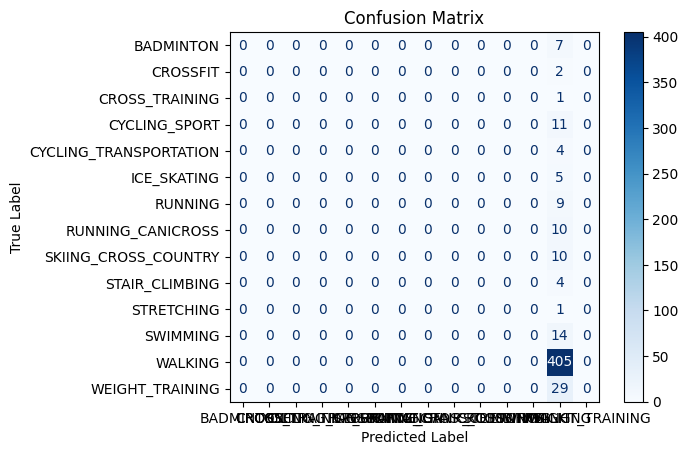

In [530]:
### KNN Classification
DF1_SPORT_MAX_ACCURACY = max(DF1_SPORT_ACCURACY_DICT.values())
DF1_SPORT_MAX_ACCURACY_nNeighbours = max(DF1_SPORT_ACCURACY_DICT, key=DF1_SPORT_ACCURACY_DICT.get)
print(f"The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of {DF1_SPORT_MAX_ACCURACY} is {DF1_SPORT_MAX_ACCURACY_nNeighbours}. Therefore, the selected model is the corresponding model of that accuracy.")
DF1_SPORT_MODEL_KNN = DF1_SPORT_MODEL_DICT[DF1_SPORT_MAX_ACCURACY_nNeighbours]
DF1_SPORT_Ytest_pred_KNN = DF1_SPORT_Ytest_pred_DICT[DF1_SPORT_MAX_ACCURACY_nNeighbours]
DF1_SPORT_ACCURACY_KNN = DF1_SPORT_ACCURACY_DICT[DF1_SPORT_MAX_ACCURACY_nNeighbours]

plottingConfusionMatrix(DF1_SPORT_MODEL_KNN, DF1_SPORT_Xtest, DF1_SPORT_Ytest)

# Save the model to disk
DF1_SPORT_MODEL_KNN_filename = 'model/DF1_SPORT_MODEL_KNN.sav'
#joblib.dump(DF1_SPORT_MODEL_KNN, DF1_SPORT_MODEL_KNN_filename)

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 76.17%


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


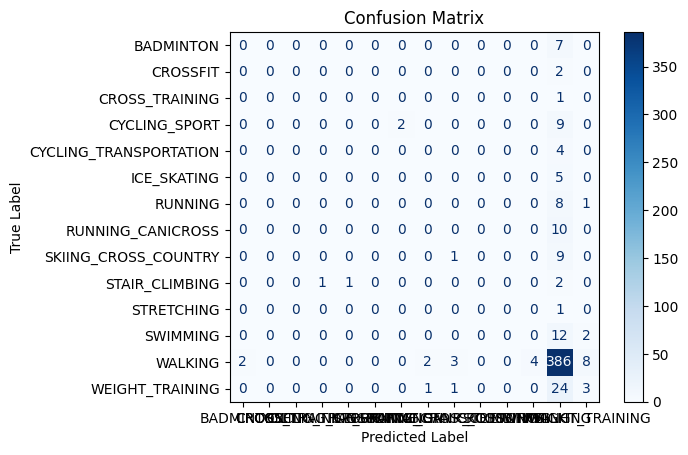

In [531]:
### Logistic regression
DF1_SPORT_MODEL_LOG, DF1_SPORT_Ytest_pred_LOG, DF1_SPORT_ACCURACY_LOG = LogisticRegress_Multiclass(DF1_SPORT_Xtrain, DF1_SPORT_Xtest, DF1_SPORT_Ytrain, DF1_SPORT_Ytest)
plottingConfusionMatrix(DF1_SPORT_MODEL_LOG, DF1_SPORT_Xtest, DF1_SPORT_Ytest)

# Save the model to disk
DF1_SPORT_MODEL_LOG_filename = 'model/DF1_SPORT_MODEL_LOG.sav'
#joblib.dump(DF1_SPORT_MODEL_LOG, DF1_SPORT_MODEL_LOG_filename)


Accuracy: 65.62%


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


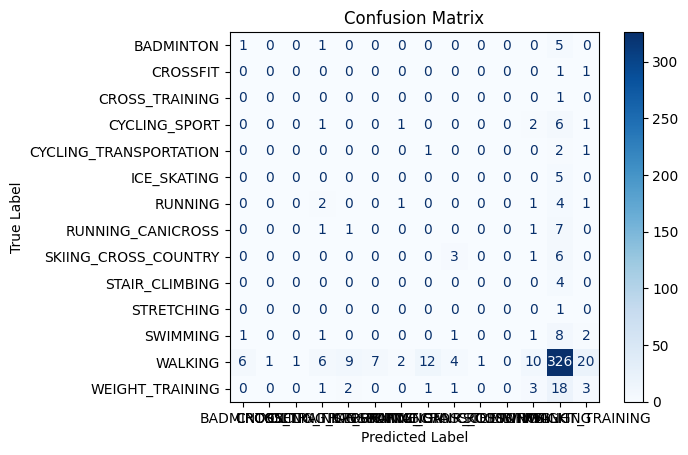

In [532]:
### Decision Tree Classification
DF1_SPORT_MODEL_TREE, DF1_SPORT_Ytest_pred_TREE, DF1_SPORT_ACCURACY_TREE = DecisionTreeClassify(DF1_SPORT_Xtrain, DF1_SPORT_Xtest, DF1_SPORT_Ytrain, DF1_SPORT_Ytest)
plottingConfusionMatrix(DF1_SPORT_MODEL_TREE, DF1_SPORT_Xtest, DF1_SPORT_Ytest)

# Save the model to disk
DF1_SPORT_MODEL_TREE_filename = 'model/DF1_SPORT_MODEL_TREE.sav'
#joblib.dump(DF1_SPORT_MODEL_TREE, DF1_SPORT_MODEL_TREE_filename)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 2 - KNN Classification for time prediction
</div>

In [533]:
nNeighboursTuning = list(range(7, 50))
DF1_DAYTIME_MODEL_DICT, DF1_DAYTIME_Ytest_pred_DICT, DF1_DAYTIME_ACCURACY_DICT = KNNClassify(DF1_DAYTIME_Xtrain, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytrain, DF1_DAYTIME_Ytest, nNeighboursTuning)
print("Accuracy of KNN model for predicting TIME of Alternative 1 ...\n<number of neighbours> : <accuracy>")
printDict(DF1_DAYTIME_ACCURACY_DICT)

Accuracy of KNN model for predicting TIME of Alternative 1 ...
<number of neighbours> : <accuracy>
7  :  50.0
8  :  50.5859375
9  :  50.1953125
10  :  49.8046875
11  :  49.4140625
12  :  51.7578125
13  :  49.8046875
14  :  50.390625
15  :  49.4140625
16  :  51.3671875
17  :  50.5859375
18  :  51.5625
19  :  50.9765625
20  :  51.5625
21  :  53.515625
22  :  53.515625
23  :  52.9296875
24  :  51.953125
25  :  50.5859375
26  :  50.5859375
27  :  49.609375
28  :  50.9765625
29  :  50.78125
30  :  51.171875
31  :  50.9765625
32  :  51.171875
33  :  50.9765625
34  :  51.5625
35  :  51.7578125
36  :  51.171875
37  :  52.34375
38  :  51.7578125
39  :  53.3203125
40  :  52.34375
41  :  53.515625
42  :  52.9296875
43  :  53.515625
44  :  54.296875
45  :  53.90625
46  :  53.125
47  :  54.296875
48  :  52.734375
49  :  54.1015625


The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of 54.296875 is 44. Therefore, the selected model is the corresponding model of that accuracy.
 The model can be accessed from:


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


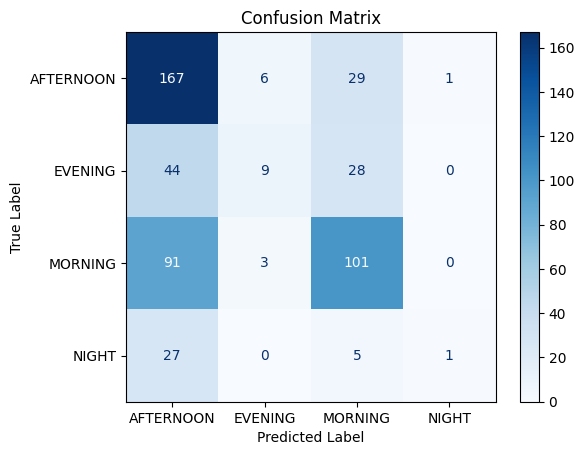

In [534]:
DF1_DAYTIME_MAX_ACCURACY = max(DF1_DAYTIME_ACCURACY_DICT.values())
DF1_DAYTIME_MAX_ACCURACY_nNeighbours = max(DF1_DAYTIME_ACCURACY_DICT, key=DF1_DAYTIME_ACCURACY_DICT.get)
print(f"The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of {DF1_DAYTIME_MAX_ACCURACY} is {DF1_DAYTIME_MAX_ACCURACY_nNeighbours}. Therefore, the selected model is the corresponding model of that accuracy.\n The model can be accessed from:")
DF1_DAYTIME_MODEL_KNN = DF1_DAYTIME_MODEL_DICT[DF1_DAYTIME_MAX_ACCURACY_nNeighbours]
DF1_DAYTIME_Ytest_pred = DF1_DAYTIME_Ytest_pred_DICT[DF1_DAYTIME_MAX_ACCURACY_nNeighbours]
DF1_DAYTIME_ACCURACY = DF1_DAYTIME_ACCURACY_DICT[DF1_DAYTIME_MAX_ACCURACY_nNeighbours]

plottingConfusionMatrix(DF1_DAYTIME_MODEL_KNN, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytest)

# Save the model to disk
DF1_DAYTIME_MODEL_KNN_filename = 'model/DF1_DAYTIME_MODEL_KNN.sav'
#joblib.dump(DF1_DAYTIME_MODEL_KNN, DF1_DAYTIME_MODEL_KNN_filename)

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 66.8%


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


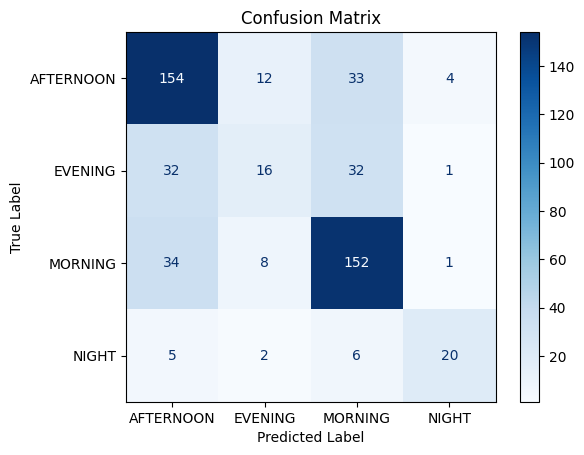

In [535]:
### Logistic regression
DF1_DAYTIME_MODEL_LOG, DF1_DAYTIME_Ytest_pred_LOG, DF1_DAYTIME_ACCURACY_LOG = LogisticRegress_Multiclass(DF1_DAYTIME_Xtrain, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytrain, DF1_DAYTIME_Ytest)
plottingConfusionMatrix(DF1_DAYTIME_MODEL_LOG, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytest)

# Save the model to disk
DF1_TIME_MODEL_LOG_filename = 'model/DF1_TIME_MODEL_LOG.sav'
#joblib.dump(DF1_DAYTIME_MODEL_LOG, DF1_DAYTIME_MODEL_LOG_filename)

Accuracy: 60.74%


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


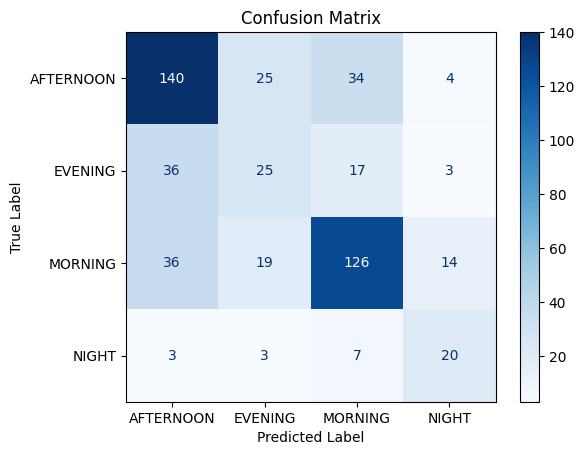

In [536]:
### Decision Tree Classification
DF1_DAYTIME_MODEL_TREE, DF1_DAYTIME_Ytest_pred_TREE, DF1_DAYTIME_ACCURACY_TREE = DecisionTreeClassify(DF1_DAYTIME_Xtrain, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytrain, DF1_DAYTIME_Ytest)
plottingConfusionMatrix(DF1_DAYTIME_MODEL_TREE, DF1_DAYTIME_Xtest, DF1_DAYTIME_Ytest)

# Save the model to disk
DF1_DAYTIME_MODEL_TREE_filename = 'model/DF1_DAYTIME_MODEL_TREE.sav'
#joblib.dump(DF1_DAYTIME_MODEL_TREE, DF1_DAYTIME_MODEL_TREE_filename)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 2.1 - Huber Regression for time prediction in terms of hours
</div>

In [537]:
def HuberRegress(Xtrain, Xtest, Ytrain, Ytest):
    model = HuberRegressor(fit_intercept=True)
    model.fit(Xtrain, Ytrain)

    # Get the optimal weight vector w of the fitted model 
    w_opt = model.coef_

    # Get the optimal intercept of the fitted model  
    w_intercept = model.intercept_

    # Print the optimal weight vector 
    display(Math(r'$\mathbf{w}_{\rm opt} ='))
    print(w_opt)

    # Print the optimal intercept
    display(Math(r'${w}_{0 \rm opt} ='))
    print(w_intercept)

    Ytest_pred = model.predict(Xtest)

    model_mean_absolute_error = mean_absolute_error(Ytest, Ytest_pred)
    print(f"mean_absolute_error is {model_mean_absolute_error}")

    model_mean_squared_error = mean_squared_error(Ytest, Ytest_pred)
    print(f"mean_squared_error is {model_mean_squared_error}")

    pred_df = pd.DataFrame({'Actual': Ytest, 'Predicted': Ytest_pred})
    display(pred_df)

    return model, Ytest_pred, model_mean_absolute_error

### start time Hour prediction
DF1_HOUR_MODEL, DF1_HOUR_Ytest_pred, DF1_HOUR_MEANERROR = HuberRegress(DF1_HOUR_Xtrain, DF1_HOUR_Xtest, DF1_HOUR_Ytrain, DF1_HOUR_Ytest)

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<IPython.core.display.Math object>

[-1.99438988e+00  1.30929072e-01  3.79341565e-01 -3.53303244e-01
  1.66547926e-01 -7.02758269e-01 -3.75761312e-01  6.58387948e-02
 -3.07548201e-01 -3.75116351e-01 -3.86026667e-01 -3.11553557e-03
 -4.80162505e-01 -1.04994086e+00  3.00434236e-01 -1.44063497e-01
 -3.48282544e-01  1.03879465e+00 -2.70264629e-01 -4.45362149e-01
  4.88343318e-01  2.79627997e-01  1.04538607e-01 -3.74276799e-01
  5.12966087e-03 -1.23342743e-01 -3.61364877e-02 -3.61626874e-01
  2.72509866e-01  1.99562393e-02 -1.20126024e+00 -3.26123049e-01
  1.60265190e-01  9.13944154e-02  4.02375077e-02 -2.13336981e-01
 -1.17740357e-01  4.94041800e-01  1.66220315e-01 -3.28213013e-01
 -1.70355558e-01 -3.41669751e-01 -2.54028332e-01 -2.70088747e-02
  6.23416142e-01 -1.11020029e-01 -4.98338735e-02  4.39308059e-01
 -7.96567973e-02 -1.50611775e-01 -7.86554956e-02  4.50390181e-01
  2.31255168e-01 -2.83883008e-01  1.00707275e-01  2.13869210e-01
  2.85907903e-01  3.87007237e-01 -5.14816307e-02 -7.61367306e-02
  8.28702424e-01 -1.32803

<IPython.core.display.Math object>

0.3671252119002525
mean_absolute_error is 3.113624186745994
mean_squared_error is 16.823192937350782


,Actual,Predicted
0,14,13.710032
1,6,7.367433
2,7,10.097547
3,15,17.295597
4,15,6.848952
...,...,...
507,9,15.166445
508,13,15.994747
509,6,8.863222
510,8,10.281157


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 1:</b> Model 3 - Huber Regression for duration prediction
</div>

In [538]:

DF1_DUR_MODEL, DF1_DUR_Ytest_pred, DF1_DUR_MEANERROR = HuberRegress(DF1_DUR_Xtrain, DF1_DUR_Xtest, DF1_DUR_Ytrain, DF1_DUR_Ytest)

# Save the model to disk
DF1_DUR_MODEL_filename = 'model/DF1_DUR_MODEL.sav'
#joblib.dump(DF1_DUR_MODEL, DF1_DUR_MODEL_filename)

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<IPython.core.display.Math object>

[-2.54687806e+02  1.13857590e+02  2.53117830e+02  9.44233162e+01
  2.45315851e+02  9.16937073e+01 -1.59941852e+02  7.99400158e+01
  3.14774625e+01  2.23700509e+02  2.02890482e+02 -7.25821251e+00
  1.12633971e+02  8.05453283e+01  8.07025490e+01 -2.86111805e+02
  6.16610028e+01 -2.02394533e+01  1.19690016e+02 -2.25060139e+02
 -1.48163248e+02  3.91952486e+01  1.27327322e+02 -1.36870531e+02
  1.11333365e+02  1.69964249e+01 -6.09029963e+00 -9.50478970e+01
 -1.00397359e+01 -1.49157486e+02 -3.51900458e+02  6.54036136e+01
 -5.06159372e+01  1.13762286e+02  1.34995446e+02 -4.65882679e+01
 -1.34780964e+01 -1.33219329e+01 -8.06194467e+01  1.44973726e+02
  2.14079869e+02 -1.23899740e+02 -1.48191988e+01  1.40994261e+02
  3.13200958e+01 -1.09504396e+02 -1.19849869e+01  7.64578690e+01
  4.01386052e+01  5.11663586e+01  8.18377870e+01 -3.26297470e+01
  5.72242852e+01 -6.86713720e+01 -8.70102206e+00 -8.69931187e+01
 -9.15346729e+01 -8.15738808e+01 -2.30781434e+01  7.01012454e+00
  2.94953830e+01 -4.41246

<IPython.core.display.Math object>

41.4443668252866
mean_absolute_error is 705.2453355057786
mean_squared_error is 833829.5714603905


,Actual,Predicted
0,3721,2447.831544
1,1674,1612.791576
2,3314,2260.654927
3,2381,2162.221583
4,3600,1505.631363
...,...,...
507,1903,2500.269278
508,2580,2303.421055
509,1656,1863.372458
510,1748,2326.901764


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 2:</b> Model 1 - KNN Classification for sport prediction
</div>

In [539]:
### Dataset DF2_SPORT_X
nNeighboursTuning = list(range(7, 50))
DF2_SPORT_MODEL_DICT, DF2_SPORT_Ytest_pred_DICT, DF2_SPORT_ACCURACY_DICT = KNNClassify(DF2_SPORT_Xtrain, DF2_SPORT_Xtest, DF2_SPORT_Ytrain, DF2_SPORT_Ytest, nNeighboursTuning)
print("Accuracy of KNN model for predicting SPORT of Alternative 2 ...\n<number of neighbours> : <accuracy>")
printDict(DF2_SPORT_ACCURACY_DICT)

Accuracy of KNN model for predicting SPORT of Alternative 2 ...
<number of neighbours> : <accuracy>
7  :  77.9296875
8  :  78.515625
9  :  79.1015625
10  :  78.90625
11  :  79.1015625
12  :  79.1015625
13  :  79.1015625
14  :  79.1015625
15  :  79.1015625
16  :  79.1015625
17  :  79.1015625
18  :  79.1015625
19  :  79.1015625
20  :  79.1015625
21  :  79.1015625
22  :  79.1015625
23  :  79.1015625
24  :  79.1015625
25  :  79.1015625
26  :  79.1015625
27  :  79.1015625
28  :  79.1015625
29  :  79.1015625
30  :  79.1015625
31  :  79.1015625
32  :  79.1015625
33  :  79.1015625
34  :  79.1015625
35  :  79.1015625
36  :  79.1015625
37  :  79.1015625
38  :  79.1015625
39  :  79.1015625
40  :  79.1015625
41  :  79.1015625
42  :  79.1015625
43  :  79.1015625
44  :  79.1015625
45  :  79.1015625
46  :  79.1015625
47  :  79.1015625
48  :  79.1015625
49  :  79.1015625


The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of 79.1015625 is 9. Therefore, the selected model is the corresponding model of that accuracy.
 The model can be accessed from:


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


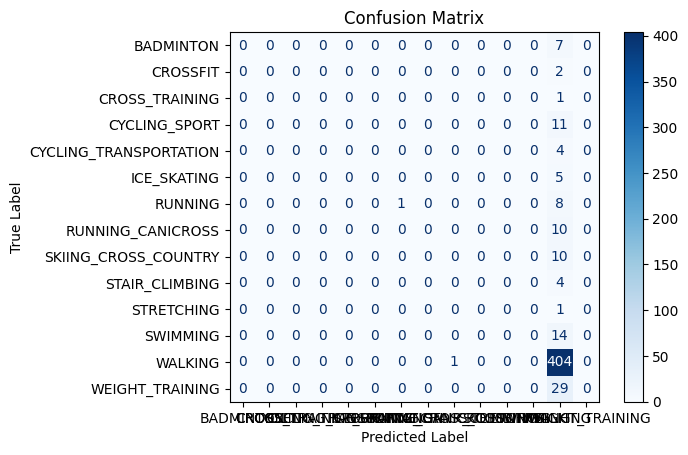

In [540]:
#del max
DF2_SPORT_MAX_ACCURACY = max(DF2_SPORT_ACCURACY_DICT.values())
DF2_SPORT_MAX_ACCURACY_nNeighbours = max(DF2_SPORT_ACCURACY_DICT, key=DF2_SPORT_ACCURACY_DICT.get)
print(f"The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of {DF2_SPORT_MAX_ACCURACY} is {DF2_SPORT_MAX_ACCURACY_nNeighbours}. Therefore, the selected model is the corresponding model of that accuracy.\n The model can be accessed from:")
DF2_SPORT_MODEL = DF2_SPORT_MODEL_DICT[DF2_SPORT_MAX_ACCURACY_nNeighbours]
DF2_SPORT_Ytest_pred = DF2_SPORT_Ytest_pred_DICT[DF2_SPORT_MAX_ACCURACY_nNeighbours]
DF2_SPORT_ACCURACY = DF2_SPORT_ACCURACY_DICT[DF2_SPORT_MAX_ACCURACY_nNeighbours]

plottingConfusionMatrix(DF2_SPORT_MODEL, DF2_SPORT_Xtest, DF2_SPORT_Ytest)

# Save the model to disk
DF2_SPORT_MODEL_filename = 'model/DF2_SPORT_MODEL.sav'
#joblib.dump(DF2_SPORT_MODEL, DF2_SPORT_MODEL_filename)

<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 2:</b> Model 2 - KNN Classification for time prediction
</div>

In [541]:
nNeighboursTuning = list(range(7, 50))
DF2_DAYTIME_MODEL_DICT, DF2_DAYTIME_Ytest_pred_DICT, DF2_DAYTIME_ACCURACY_DICT = KNNClassify(DF2_DAYTIME_Xtrain, DF2_DAYTIME_Xtest, DF2_DAYTIME_Ytrain, DF2_DAYTIME_Ytest, nNeighboursTuning)
print("Accuracy of KNN model for predicting DAYTIME of Alternative 2 ...\n<number of neighbours> : <accuracy>")
printDict(DF2_DAYTIME_ACCURACY_DICT)

Accuracy of KNN model for predicting DAYTIME of Alternative 2 ...
<number of neighbours> : <accuracy>
7  :  50.5859375
8  :  50.9765625
9  :  51.5625
10  :  51.5625
11  :  51.953125
12  :  51.3671875
13  :  53.125
14  :  51.953125
15  :  50.9765625
16  :  50.0
17  :  50.78125
18  :  50.5859375
19  :  49.8046875
20  :  51.171875
21  :  50.1953125
22  :  50.5859375
23  :  51.171875
24  :  51.7578125
25  :  51.5625
26  :  51.953125
27  :  52.1484375
28  :  51.3671875
29  :  52.1484375
30  :  52.1484375
31  :  52.34375
32  :  52.9296875
33  :  51.7578125
34  :  53.125
35  :  51.953125
36  :  52.34375
37  :  53.3203125
38  :  52.9296875
39  :  54.4921875
40  :  52.734375
41  :  52.734375
42  :  50.9765625
43  :  51.171875
44  :  51.7578125
45  :  51.7578125
46  :  51.7578125
47  :  52.734375
48  :  52.1484375
49  :  53.7109375


The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of 54.4921875 is 39. Therefore, the selected model is the corresponding model of that accuracy.
 The model can be accessed from:


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


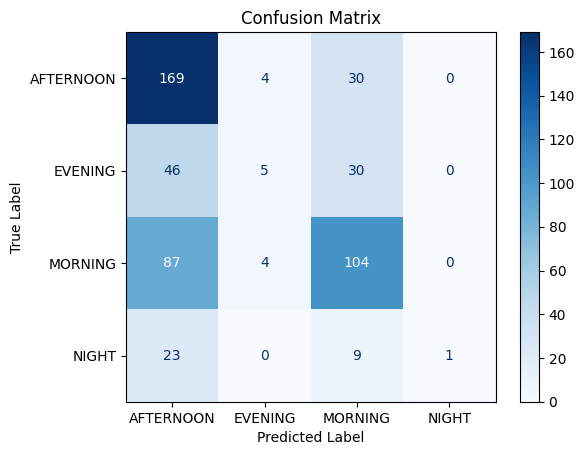

In [542]:
DF2_DAYTIME_MAX_ACCURACY = max(DF2_DAYTIME_ACCURACY_DICT.values())
DF2_DAYTIME_MAX_ACCURACY_nNeighbours = max(DF2_DAYTIME_ACCURACY_DICT, key=DF2_DAYTIME_ACCURACY_DICT.get)
print(f"The number of neighbours, which is within the defined tuning parameters, generating the maximum accuracy of {DF2_DAYTIME_MAX_ACCURACY} is {DF2_DAYTIME_MAX_ACCURACY_nNeighbours}. Therefore, the selected model is the corresponding model of that accuracy.\n The model can be accessed from:")
DF2_DAYTIME_MODEL = DF2_DAYTIME_MODEL_DICT[DF2_DAYTIME_MAX_ACCURACY_nNeighbours]
DF2_DAYTIME_Ytest_pred = DF2_DAYTIME_Ytest_pred_DICT[DF2_DAYTIME_MAX_ACCURACY_nNeighbours]
DF2_DAYTIME_ACCURACY = DF2_DAYTIME_ACCURACY_DICT[DF2_DAYTIME_MAX_ACCURACY_nNeighbours]

plottingConfusionMatrix(DF2_DAYTIME_MODEL, DF2_DAYTIME_Xtest, DF2_DAYTIME_Ytest)

# Save the model to disk
DF2_DAYTIME_MODEL_filename = 'model/DF2_DAYTIME_MODEL.sav'
#joblib.dump(DF2_DAYTIME_MODEL, DF2_DAYTIME_MODEL_filename)

In [543]:
### start time Hour prediction
DF2_HOUR_MODEL, DF2_HOUR_Ytest_pred, DF2_HOUR_MEANERROR = HuberRegress(DF2_HOUR_Xtrain, DF2_HOUR_Xtest, DF2_HOUR_Ytrain, DF2_HOUR_Ytest)

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<IPython.core.display.Math object>

[-3.44581423e+00  1.14302038e+00  7.23959121e-01  1.96620019e-02
  5.05402782e-01 -1.36585417e+00 -3.72200559e-01 -4.30180050e-01
 -3.44476671e-01 -8.90830823e-01 -3.88907111e-01  9.63599868e-01
 -4.80089406e-01 -2.45191855e+00 -3.55563380e-01  1.07970257e-02
 -4.42578374e-01  1.60876387e+00  1.79857209e-02 -8.50458297e-01
  1.22648143e+00  2.61932221e-01  2.90474949e-01 -1.31682253e+00
  2.38585941e-01  7.37825356e-02  3.82120783e-01  2.46825400e-01
  5.56191433e-01 -6.59325319e-02 -1.14338318e+00 -3.66024212e-01
 -7.64053450e-01  8.11462657e-01  8.53515937e-03 -3.11424712e-01
  6.27922972e-03  9.92984838e-01  4.86063072e-02 -8.82591270e-01
  3.49984255e-01 -9.61559564e-01  3.72938518e-01  6.96461418e-01
  4.21014523e-01 -6.50890074e-01 -1.27430816e-01  1.14097107e+00
 -3.20077585e-01 -3.07924133e-01 -4.22548924e-01  1.26010849e+00
  6.45864757e-01 -9.39716940e-01  7.76897116e-01  4.92706034e-01
  9.51437693e-01  1.23302720e+00 -6.51175033e-01  1.06504023e-01
  1.59492781e-01 -2.88694

<IPython.core.display.Math object>

0.45571004592832143
mean_absolute_error is 3.11840717536575
mean_squared_error is 16.98807016937865


,Actual,Predicted
0,14,13.004821
1,6,8.340425
2,7,10.073683
3,15,17.150162
4,15,8.031767
...,...,...
507,9,14.434428
508,13,15.934858
509,6,8.185154
510,8,9.656450


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b>Alternative 2:</b> Model 3 - Huber Regression for duration prediction
</div>

In [544]:
DF2_DUR_MODEL, DF2_DUR_Ytest_pred, DF2_DUR_MEANERROR = HuberRegress(DF2_DUR_Xtrain, DF2_DUR_Xtest, DF2_DUR_Ytrain, DF2_DUR_Ytest)

# Save the model to disk
DF2_DUR_MODEL_filename = 'model/DF2_DUR_MODEL.sav'
#joblib.dump(DF2_DUR_MODEL, DF2_DUR_MODEL_filename)

c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<IPython.core.display.Math object>

[-3.20093503e+02  5.09980686e+01  4.20645487e+02  1.22227822e+02
  3.60547008e+02  1.27938299e+02 -2.50544302e+02  1.26823374e+02
  9.42466671e+01  2.14870814e+02  2.32520852e+02  2.80694751e+01
  1.48475212e+02 -2.49945745e+01 -1.57082692e+01 -3.67356786e+02
  8.68240845e+01 -1.75254727e+01  8.04886816e+01 -3.20005399e+02
 -1.84586041e+02 -1.11594447e+01  1.42676586e+02 -2.02648339e+02
  9.32469698e+01  5.10507458e+01  1.90564532e+01 -1.74263064e+02
 -7.30325099e+01 -2.88869495e+02 -4.68365836e+02  2.36383413e+01
 -1.43714696e+02  1.25192673e+02  1.24465166e+02  1.67326197e+00
  5.38792866e+01 -1.15110352e+02 -1.24261472e+02  7.37658764e+01
  2.41878431e+02 -2.10563771e+02  5.36650942e+01  1.06474525e+02
 -8.86056733e+01 -2.00871201e+02 -9.64853091e+00  1.07130668e+02
  6.79485423e+01  1.56981930e+02  1.62123831e+02 -9.21900040e+01
  6.23060125e+01 -9.30438730e+01 -7.86137252e+00 -1.20136930e+02
 -1.55222359e+02 -1.41313402e+02 -5.43381059e+01  2.83856249e+01
  4.36529801e+01 -6.48383

<IPython.core.display.Math object>

165.15983514103797
mean_absolute_error is 701.8396082206646
mean_squared_error is 836178.305951823


,Actual,Predicted
0,3721,2467.582706
1,1674,1881.782121
2,3314,2005.806884
3,2381,2197.418557
4,3600,1706.106886
...,...,...
507,1903,2540.517532
508,2580,2358.654534
509,1656,1435.162114
510,1748,2006.968796
